#Feature Selection & Dimensionality Reduction
##1. Introduction to Dimensionality Reduction
##2. What is Curse of Dimensionality
##3. Linear Dimensionality Reduction
##4. Feature Selaction




##INTRODUCTION

The dataset is Electronic Health Record Predicting collected from a private Hospital in Indonesia.It contains the patient's laboratory test results used to determine next patient treatment whether in care or out care.

1=in care

0=out care

As a part of the hospital automation system, one can build a system that would predict and estimate whether the patient should be categorized as an incare patient or an outcare patient with the help of several data points about the patients, their conditions and lab tests.

##QUESTION
How to do Feature Selection and Dimenionality reduction for paitent treatment classification data?

##Why is it interesting?
Understanding which features influence treatment decisions for patients can have significant implications for healthcare. It can help medical professionals make more informed decisions about patient care and treatment plans. It can also aid in identifying patterns and factors that lead to specific treatment choices, which can be valuable for medical research and improving healthcare outcomes.

#THEORY

# Dimensionality Reduction
Dimensionality reduction is a technique used in machine learning and data analysis to reduce the number of features or variables in a dataset while preserving as much relevant information as possible. High-dimensional data, where each data point has many attributes or features, can be challenging to work with due to increased computational complexity and the risk of overfitting models. Dimensionality reduction aims to address these challenges by transforming the data into a lower-dimensional representation, often in the form of a set of new variables or features.


# What is Curse of Dimensionality
The "curse of dimensionality" is a term used to describe various challenges and problems that arise when dealing with high-dimensional data, particularly in machine learning and data analysis. It refers to the adverse effects of adding more and more dimensions (features or attributes) to a dataset, and it can significantly impact the performance and efficiency of algorithms. Here are some of the key issues associated with the curse of dimensionality:

Overfitting: In high-dimensional spaces, models can easily fit to noise in the data rather than the underlying patterns.

Computational difficulties: Some algorithms can become computationally expensive or infeasible when dealing with high-dimensional data.

Difficulty in visualizing the data: It becomes challenging to visualize high-dimensional data, making it difficult to understand the relationships between variables.

Before starting the process of building data models, it's essential to perform pre-processing steps to make the dataset more manageable and suitable for analysis with specific methods. These pre-processing steps encompass various techniques, like dimensionality reduction and feature selection, which are designed to simplify the dataset by eliminating unnecessary features while minimizing the loss of accuracy.

# Linear Dimensionality Reduction
Linear dimensionality reduction is a class of dimensionality reduction techniques that aim to reduce the dimensionality of a dataset while maintaining a linear relationship between the original features and the reduced-dimensional representation. These methods seek to find linear combinations of the original features to create new, lower-dimensional features or projections.

##a) Principal Component Analysis (PCA)
Principal Component Analysis (PCA) is a dimensionality reduction technique widely used in statistics, machine learning, and data analysis. Its primary objective is to reduce the dimensionality of a dataset while preserving as much of the relevant variation or information as possible. PCA achieves this by transforming the original features into a new set of orthogonal (uncorrelated) features called principal components. These principal components are ranked by their ability to explain the variance in the data, with the first principal component capturing the most variance, the second capturing the second-most, and so on.



In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor


PCA (Principal Component Analysis) is suitable for numerical datasets comprising continuous variables, excluding categorical data. It's important for the dataset to contain a minimum of two variables, and it's generally advisable to have at least 5 to 10 times more observations than there are variables.

In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/bhoiru/Data_Sci/main/training_set.csv')
df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0


Cheking for Null Values (Missing Values)

In [26]:
df.isnull().sum()

HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64

In [27]:
df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0


In [29]:
X=df.iloc[:,:-2]
y=df.iloc[:,-1]

In [32]:
print(X.shape)
X.head()

(3309, 9)


,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36


In [33]:
print(y.shape)
y.head()

(3309,)


0    1
1    0
2    0
3    0
4    0
Name: SOURCE, dtype: int64


##Checking for Multicollinearity
PCA assumes that the variables are linearly related, so it is important to check for multicollinearity before applying PCA. If there is high correlation between the variables, PCA may not be appropriate

In [34]:
correlation=X.corr()
eigenvalues, eigenvectors = np.linalg.eig(correlation)

Eigenvalues in PCA signify the amount of variance that each principal component explains. When you encounter one or more small eigenvalues, it suggests a high degree of correlation among the variables, potentially indicating the presence of multicollinearity in the dataset.

In [35]:
small_eigenvalues = eigenvalues[eigenvalues < 1]

if len(small_eigenvalues) > 0:
    print("There are small eigenvalues in the correlation matrix, thus varialbles are not highly correlated")
else:
    print("There are no small eigenvalues in the correlation matrix.")

There are small eigenvalues in the correlation matrix, thus varialbles are not highly correlated


Moreover, PCA requires that the data be standardized, meaning that each variable should be scaled to have a mean of zero and a standard deviation of one. This is necessary because PCA is sensitive to differences in scale between variables, and standardization ensures that all variables are treated equall



In [36]:
X_scaled=StandardScaler().fit_transform(X)

## Deciding n_components for PCA

Calculate the total sum of eigenvalues.

In [37]:
sortedValues = np.argsort(eigenvalues, axis=0)[::-1]
sortedVectors = eigenvectors[:, sortedValues]

Determine the proportion of variance explained by individual principal components by dividing each component's eigenvalue by the total sum of eigenvalues.

Compute the cumulative proportion of variance explained by summing up the proportions of variance explained by all principal components.

Select the number of principal components that account for the desired amount of explained variance.

<ipython-input-38-9dcd7d8b4dc9>:8: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(1, 10, 1)


(1.0, 10.0)

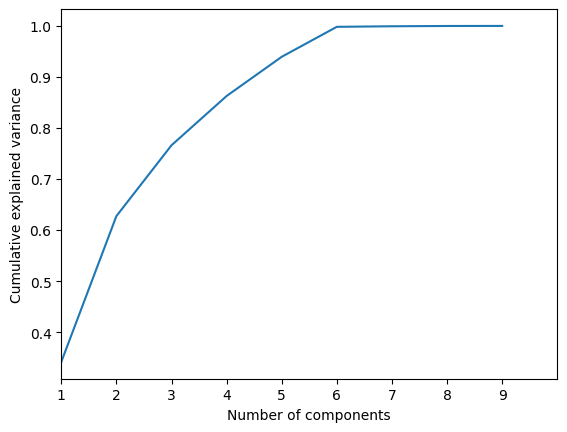

In [38]:
cumulative_sum = np.cumsum(eigenvalues[sortedValues]) / np.sum(eigenvalues[sortedValues])
xint = range(1, len(cumulative_sum) + 1)
plt.plot(xint, cumulative_sum)

plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.xticks(xint)
plt.xlim(1, 10, 1)

Selecting the right number of principal components in PCA is a crucial dimensionality reduction step. Several methods exist to help determine the appropriate number of principal components. Here are three common approaches:

Scree Plot: The scree plot illustrates the variance explained by each principal component. We can pick the number of principal components aligned with the "elbow" point on the scree plot, signifying the stage at which adding more components yields diminishing improvements in explaining variance.

From the graph above, we see that 6 componenets are sufficient to capture over 95% of the variance in the data. Hence, the number of input dimensions have been reduced from 9 to 6 by implementing PCA

In [39]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_pca = pca.fit_transform(X_scaled)

In [40]:
X_pca.shape

(3309, 6)

##Implementing Logistic Regression on PCA transformed data

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train logistic regression model on transformed data
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict on test set and evaluate performance
y_pred = lr.predict(X_test)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming you have your X_pca and y ready

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only - as class is imbalanced
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train logistic regression model on the resampled data
lr = LogisticRegression()
lr.fit(X_train_resampled, y_train_resampled)

# Predict on test set and evaluate performance
y_pred = lr.predict(X_test)

# Now, you can evaluate the performance of your logistic regression model
# using metrics like accuracy, precision, recall, F1-score, etc.


In [43]:
# Evaluate the model on the training data
train_accuracy = lr.score(X_train, y_train)
print("Training accuracy:", train_accuracy)

# Evaluate the model on the testing data
test_accuracy = lr.score(X_test, y_test)
print("Testing accuracy:", test_accuracy)

Training accuracy: 0.6992822062712505
Testing accuracy: 0.7009063444108762


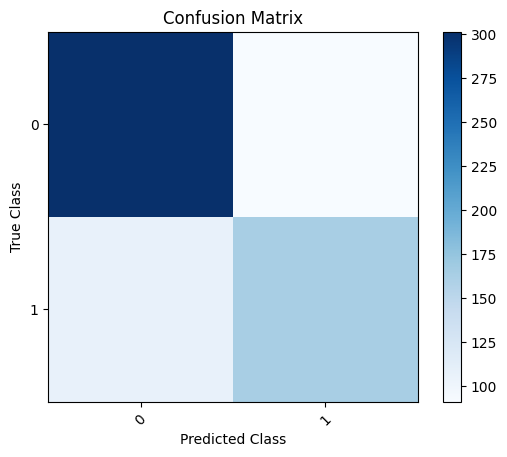

              precision    recall  f1-score   support

           0       0.74      0.77      0.75       392
           1       0.64      0.60      0.62       270

    accuracy                           0.70       662
   macro avg       0.69      0.69      0.69       662
weighted avg       0.70      0.70      0.70       662



In [44]:
from sklearn.metrics import confusion_matrix, classification_report
labels = np.unique(y)
cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Print classification report
report = classification_report(y_test, y_pred, labels=labels)
print(report)

From the confusion matrix above, we see that the model is performing better in identifying class=0 with a precision and recall of 0.74 and 0.77 respectively. The performance for class=1 is not bad either.

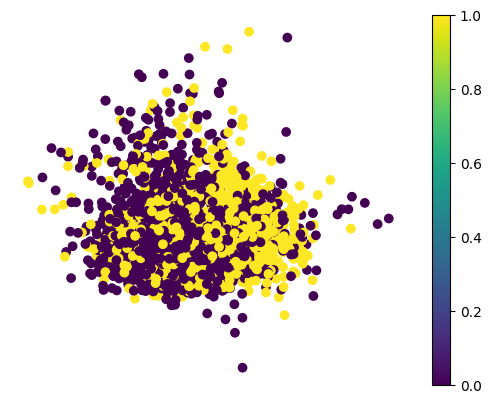

In [45]:
from sklearn.decomposition import PCA
PCA_train_x = PCA(2).fit_transform(X_scaled)

plt.scatter(PCA_train_x[:, 0], PCA_train_x[:, 1],c=y)
plt.axis('off')
plt.colorbar()
plt.show()

##b) LDA (Linear Discriminant Analysis)
Linear Discriminant Analysis (LDA) is a dimensionality reduction method applicable to both classification tasks and reducing a dataset's dimensionality. Its primary objective is to project data into a lower-dimensional space while retaining essential class-discriminatory information.

LDA's aim is to discover linear combinations of the original features that optimize the distinction between various classes..

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [49]:
# Transforming data using LDA
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

In [50]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_lda, y_train)
y_pred = clf.predict(X_test_lda)

In [51]:
# Evaluate the model on the training data
train_accuracy = clf.score(X_train_lda, y_train)
print("Training accuracy:", train_accuracy)

# Evaluate the model on the testing data
test_accuracy = clf.score(X_test_lda, y_test)
print("Testing accuracy:", test_accuracy)

Training accuracy: 0.7159047978843974
Testing accuracy: 0.7054380664652568


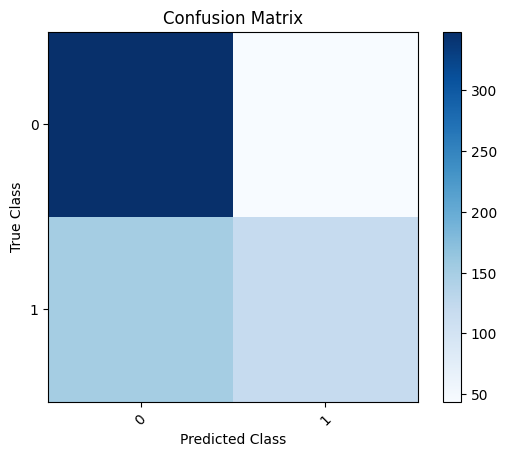

              precision    recall  f1-score   support

           0       0.70      0.89      0.78       392
           1       0.73      0.44      0.55       270

    accuracy                           0.71       662
   macro avg       0.71      0.66      0.67       662
weighted avg       0.71      0.71      0.69       662



In [52]:
from sklearn.metrics import confusion_matrix, classification_report
labels = np.unique(y)
cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Print classification report
report = classification_report(y_test, y_pred, labels=labels)
print(report)

# Feature Selection

The current era is characterized by an abundance of data, which poses a significant challenge for researchers. Effectively extracting valuable information from these vast datasets requires the development of sophisticated algorithms. Data mining tasks like classification, regression, and clustering are instrumental in constructing data models that unveil hidden patterns within the data. However, before diving into these tasks, a crucial preliminary step is data pre-processing. This step is increasingly vital due to the growing array of available analysis techniques, many of which demand large datasets for accurate results.

Data pre-processing encompasses various techniques, such as dimensionality reduction and feature selection, which aim to simplify datasets by removing redundant features without sacrificing accuracy significantly. Normalization and standardization procedures ensure that all features have similar scales, preventing any one feature from disproportionately influencing the analysis. Additionally, discretization may be employed for continuous variables like age or salary, grouping values into categories relevant to the context. These processes collectively create an optimal environment for machine learning algorithms to operate efficiently on large datasets while producing reliable results based on pertinent insights extracted from the data.

In contemporary research, data pre-processing plays a pivotal role, not only reducing computational demands but also aligning datasets with existing analytical frameworks, ultimately leading to more precise findings. Therefore, understanding the interplay between different pre-processing techniques should be a part of every researcher's toolkit. This knowledge is essential for ensuring that investigations based on extensive datasets yield meaningful results, worthy of presentation and discussion within scientific communities worldwide.

## Why do we need Feature Reduction?
Feature reduction, or dimensionality reduction, is essential in various data analysis and machine learning tasks for several important reasons:

1. Improved Model Performance: One of the primary reasons for feature reduction is to enhance the performance of machine learning models. High-dimensional datasets, with many features, can lead to overfitting, where models perform well on the training data but poorly on new, unseen data. Reducing the number of features helps mitigate overfitting, leading to more robust and accurate models.

2. Computational Efficiency: With fewer features, machine learning algorithms require less computational resources and time for training and inference. This is particularly crucial when dealing with large datasets, as reducing dimensionality can significantly speed up processing.

3. Enhanced Model Interpretability: Simplifying the dataset by removing irrelevant or redundant features makes the resulting models easier to interpret. Understanding the most important features can provide valuable insights into the relationships within the data.

4. Improved Generalization: Feature reduction techniques aim to retain the most relevant information while discarding less important details. This can lead to models that generalize better to new data, as they focus on the most significant patterns and relationships.

5. Noise Reduction: High-dimensional datasets often contain noisy or irrelevant features that can adversely affect model performance. Feature reduction helps filter out such noise, resulting in cleaner and more informative data representations.

6. Visualization: Visualizing high-dimensional data can be challenging. By reducing dimensionality, you can project the data into lower-dimensional spaces (e.g., 2D or 3D) for easier visualization and exploration.

7. Curse of Dimensionality: High-dimensional spaces can exhibit the "curse of dimensionality," where data becomes sparse, and the distance between data points becomes less meaningful. Feature reduction can mitigate this issue by focusing on the most informative features.

8. Reduced Storage Requirements: Storing high-dimensional data can be resource-intensive. Reducing dimensionality reduces storage requirements, making it more manageable and cost-effective, especially in big data applications.

9. Enhanced Feature Engineering: In some cases, feature reduction techniques can help identify which features are the most important for a specific task. This information can guide feature engineering efforts, helping researchers and data scientists create more relevant and effective features.

Overall, feature reduction is a valuable tool in data analysis and machine learning because it helps address challenges associated with high-dimensional data, leading to better model performance, efficiency, and interpretability. However, it's essential to choose the right feature reduction technique based on the characteristics of the data and the specific objectives of the analysis or modeling task.


**Classifying Feature Selection Methods**

Feature selection methods can be classified in a number of ways. The most common one is the classification into filters, wrappers, embedded and hybrid methods.

**Filter Methods:** Filter methods rank features based on their statistical properties or relevance to the target variable, without considering the machine learning model. Common metrics used in filter methods include correlation, mutual information, and statistical tests. Features are then selected or ranked based on these metrics, and a threshold is set to determine which features to keep.

**Wrapper Methods:** Wrapper methods evaluate different subsets of features by training and testing a machine learning model on each subset. Common wrapper methods include forward selection, backward elimination, and recursive feature elimination (RFE). These methods use the performance of the model as a criterion for selecting features.

**Embedded Methods:** Embedded methods incorporate feature selection as an integral part of the model training process. For example, in linear models, L1 regularization (Lasso) can automatically perform feature selection by setting some feature coefficients to zero. Decision tree-based algorithms like Random Forest can also provide feature importance scores, helping you identify the most relevant features.

The choice of feature selection method depends on the specific problem, dataset, and machine learning algorithm you are using. It's often necessary to experiment with different methods and evaluate their impact on model performance to determine the most effective feature selection strategy for your task.



## Structured and Streaming Features
The Grafting algorithm is a regularization-based technique that focuses on the structure of features within a dataset. It starts by picking a subset of features and then gradually adds more based on how they correlate with the selected ones. This approach is useful for identifying groups of related variables and those with lower intercorrelations.

The Alpha-Investing algorithm, on the other hand, employs Lasso regularization to choose relevant feature subsets from datasets that have structured data, such as those with spatial or temporal patterns, distinct or overlapping groups, and tree or graph-like structures.

Similarly, the OSFS algorithm utilizes Lasso regularization for feature selection but takes an extra step of dividing the dataset into subgroups based on specific criteria before applying the technique. This ensures that only pertinent variables are selected within each subgroup.

Lastly, there's a dynamic fuzzy rough set approach that considers both static and dynamic aspects when picking an optimal subset from datasets with complex structures like graphs or trees. This method identifies patterns among different attribute sets over time to determine how they interact when making accurate predictions. Consequently, it allows us to use only those attributes containing crucial information while disregarding others that may not significantly contribute to prediction.

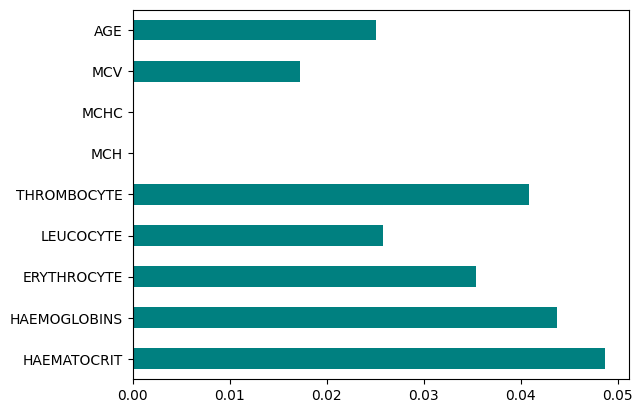

In [53]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline
importances = mutual_info_classif(X, y)
feat_importances = pd.Series(importances, X.columns[0:len(X.columns)])
feat_importances.plot(kind='barh', color = 'teal')
plt.show()

By visualizing feature importance, we get some context as to which feature contributes how much in categorizing the data point into it's respective class. We see that 6 omponents have enough weight to capture 95%+ of variance in the data.

In [54]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = X.astype(int)
chi2_features = SelectKBest(chi2, k = 3)
X_kbest_features = chi2_features.fit_transform(X, y)
# Reduced features
print('Original feature number:', X.shape[1])
print('Reduced feature number:',X_kbest_features.shape[1])

Original feature number: 9
Reduced feature number: 3


<Axes: >

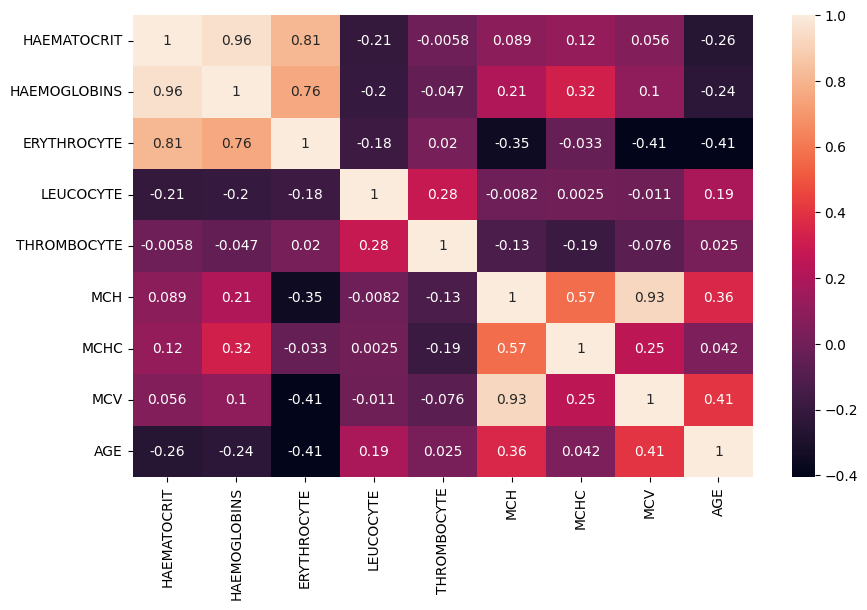

In [55]:
import seaborn as shs
import matplotlib.pyplot as plt
%matplotlib inline
# Correlation
cor = X.corr()
# Plotting Heatmap
plt.figure(figsize = (10,6))
shs.heatmap(cor, annot = True)

In [56]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Forward Feature Selection
import six
import sys
sys.modules['sklearn.externals.six'] = six
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
import sklearn.externals as extjoblib
import joblib
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

knn = KNeighborsClassifier(n_neighbors=4)
sfs1 = SFS(knn, k_features=3, forward=True, floating=False, verbose=2, scoring='accuracy', cv=0)
sfs1 = sfs1.fit(X, y)



[2023-10-03 01:41:25] Features: 1/3 -- score: 0.691145361136295
[2023-10-03 01:41:27] Features: 2/3 -- score: 0.7727410093683892
[2023-10-03 01:41:31] Features: 3/3 -- score: 0.7830160169235418

In [57]:
sfs1.subsets_

{1: {'feature_idx': (4,),
  'cv_scores': array([0.69114536]),
  'avg_score': 0.691145361136295,
  'feature_names': ('THROMBOCYTE',)},
 2: {'feature_idx': (0, 4),
  'cv_scores': array([0.77274101]),
  'avg_score': 0.7727410093683892,
  'feature_names': ('HAEMATOCRIT', 'THROMBOCYTE')},
 3: {'feature_idx': (0, 3, 4),
  'cv_scores': array([0.78301602]),
  'avg_score': 0.7830160169235418,
  'feature_names': ('HAEMATOCRIT', 'LEUCOCYTE', 'THROMBOCYTE')}}

In [58]:
feature_names = ('HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE')

sfs1 = sfs1.fit(X, y, feature_names)

sfs1.subsets_


[2023-10-03 01:41:34] Features: 1/3 -- score: 0.691145361136295
[2023-10-03 01:41:36] Features: 2/3 -- score: 0.7727410093683892
[2023-10-03 01:41:37] Features: 3/3 -- score: 0.7830160169235418

{1: {'feature_idx': (4,),
  'cv_scores': array([0.69114536]),
  'avg_score': 0.691145361136295,
  'feature_names': ('THROMBOCYTE',)},
 2: {'feature_idx': (0, 4),
  'cv_scores': array([0.77274101]),
  'avg_score': 0.7727410093683892,
  'feature_names': ('HAEMATOCRIT', 'THROMBOCYTE')},
 3: {'feature_idx': (0, 3, 4),
  'cv_scores': array([0.78301602]),
  'avg_score': 0.7830160169235418,
  'feature_names': ('HAEMATOCRIT', 'LEUCOCYTE', 'THROMBOCYTE')}}

In [59]:
sfs1.k_feature_idx_

(0, 3, 4)

In [60]:
sfs1.k_feature_names_

('HAEMATOCRIT', 'LEUCOCYTE', 'THROMBOCYTE')

In [61]:
sfs1.k_score_

0.7830160169235418

# Results


After applying Principal Component Analysis (PCA) to the Patient Treatment dataset, we found that only 6 out of the original 9 variables were necessary to effectively predict whether a patient requires inpatient or outpatient care. This successful dimensionality reduction using PCA indicates that we were able to capture the essential information while reducing the complexity of the dataset.

Furthermore, by visualizing the feature importance, we gained insights into how each feature contributes to categorizing data points into their respective classes. This analysis revealed that these 6 principal components collectively account for over 95% of the variance in the data, highlighting their significant role in understanding and classifying patient outcomes.

#References

ChatGPT

Python documentation for Pandas

Matplotlib documentation: Matplotlib

Seaborn documentationL Seaborn

J. Tang, S. Alelyani and H. Liu, "Feature Selection for Classification: A Review" in Data Classification: Algorithms and Applications, CRC Press, 2014.

https://medium.com/towards-artificial-intelligence/why-and-what-is-feature-engineering-in-ml-46a6bf7de5c6